<a href="https://colab.research.google.com/github/Rogerio-mack/IA_2025S1/blob/main/Search_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos de Busca, *Search Algorithms***


Russell, S., Norvig, P., & Intelligence, A. (1995). A modern approach. Artificial Intelligence. Prentice-Hall, Egnlewood Cliffs, 25(27), 79-80. https://aima.cs.berkeley.edu/


Os **algoritmos de busca** em Inteligência Artificial (IA) são métodos utilizados para explorar um espaço de estados, que é uma representação das possíveis configurações ou situações que podem ser alcançadas a partir de um estado inicial. O objetivo desses algoritmos é encontrar, "buscar", uma **solução** atendendo a um determinado critério, como um caminho entre dois pontos ou vencer um jogo de tabuleiro.

- **Espaço de Estado**: É o conjunto de todos os estados possíveis que podem ser alcançados a partir do estado inicial. Em geral, pode ser representado como um nó em um grafo, onde as arestas representam as transições ou ações possíveis entre os estados. Em geral há um estado inicial e uma estado final.

- **Solução**: A solução pode ser um estado final desejado ou o caminho de estados que leva a esse resultado.



### Exemplos de Espaços de Estado


![imagem](https://github.com/Rogerio-mack/IA_2025S1/blob/main/figures/tic-tac-toe.png?raw=true)
![imagem](https://github.com/Rogerio-mack/IA_2025S1/blob/main/figures/sudoku.png?raw=true)


## Exemplos de Aplicação

- **Jogos**: Caminhos em jogos de tabuleiro (xadrez, gamão etc.), labirintos e outros jogos
- **Rotas**: Algoritmos de busca para encontrar rotas entre cidades, locais, problemas logísticos de menor caminho e menor custo etc.
- **Sistemas de Recomendação**: pesquisa em espaços de estados para recomendação de produtos
- **Robótica**: ou agentes para decisões de ação em espaços discretos de estados.
- **Grafos**: Detecção de ciclo	(DFS) ou classificação topológica ordenando os nós em termos de dependências.



### Espaços de Estados simples de um Robô Aspirador

<p align="right">
  <img src="https://github.com/Rogerio-mack/IA_2025S1/blob/main/figures/vaccum_world.png?raw=true" width="60%" align="left"/>
</p>



## Tipos de Algoritmos de Busca

Os algoritmos de busca são classificados em duas categorias principais:

1. **Busca Não Informada**:
   - Esses algoritmos não utilizam informações adicionais sobre o espaço de estado além da estrutura básica do problema.

     - Busca em Largura (Breadth-First Search - BFS)
     - Busca em Profundidade (Depth-First Search - DFS)

2. **Busca Informada**:
   - Esses algoritmos utilizam heurísticas, que são estimativas do custo de alcançar a solução, para guiar a busca de forma mais eficiente.

     - Busca Gulosa (Greedy Search)
     - Algoritmo de Dijkstra (versão padrão)
     - Algoritmo A* (A-star)



# Busca não Informada

Os algoritmos mais empregados são a Busca em Largura (Breadth-First Search - BFS) e a Busca em Profundidade (Depth-First Search - DFS).

![imagem](https://github.com/Rogerio-mack/IA_2025S1/blob/main/figures/dfs-bfs-codingsec.gif?raw=true)



<p>
  <img src="https://github.com/Rogerio-mack/IA_2025S1/blob/main/figures/bfs.gif?raw=true" width="30%" align="left"/>
  <img src="https://github.com/Rogerio-mack/IA_2025S1/blob/main/figures/dfs.gif?raw=true" width="30%" align="right"/>
</p>

## Busca em Profundidade (Depth-First Search - DFS)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def plottree(tree):
  G = nx.DiGraph()

  # Adicionando nós e arestas da árvore ao gráfico
  for parent, children in tree.items():
      for child in children:
          G.add_edge(parent, child)

  # Desenhando o gráfico
  pos = nx.bfs_layout(G,'A',align='horizontal')
  # pos = nx.spring_layout(G)  # Ou use outra disposição, como nx.shell_layout(G)

  nx.draw(G, pos, with_labels=True, arrows=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
  plt.show()

  return

In [ ]:
# Recursive DFS function
path = [];

def dfs_recursive(tree, node, visited=None):
    if visited is None:
        visited = set()  # Initialize the visited set
    visited.add(node)    # Mark the node as visited
    path.append(node)
    for child in tree[node]:  # Recursively visit children
        if child not in visited:
            dfs_recursive(tree, child, visited)



In [ ]:
# Iterative DFS function
path = [];

def dfs_iterative(tree, start):
    visited = set()  # Track visited nodes
    stack = [start]  # Stack for DFS

    while stack:  # Continue until stack is empty
        node = stack.pop()  # Pop a node from the stack
        if node not in visited:
            visited.add(node)  # Mark node as visited
            path.append(node)
            stack.extend(reversed(tree[node]))  # Add child nodes to stack



In [ ]:
from collections import deque  # Import deque for efficient queue operations

# Define the BFS function
def bfs(tree, start):
    visited = []  # List to keep track of visited nodes
    queue = deque([start])  # Initialize the queue with the starting node

    while queue:  # While there are still nodes to process
        node = queue.popleft()  # Dequeue a node from the front of the queue

        if node not in visited:  # Check if the node has been visited
            visited.append(node)  # Mark the node as visited
            path.append(node)
            # print(node, end=" ")  # Output the visited node

            # Enqueue all unvisited neighbors (children) of the current node
            for neighbor in tree[node]:
                if neighbor not in visited:
                    queue.append(neighbor)  # Add unvisited neighbors to the queue

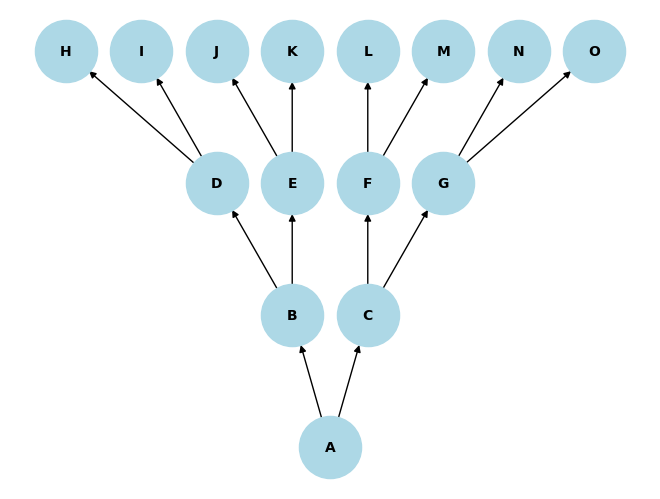

['A', 'B', 'D', 'H', 'I', 'E', 'J', 'K', 'C', 'F', 'L', 'M', 'G', 'N', 'O']


In [ ]:
# tree
tree = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H', 'I'],
    'E': ['J', 'K'],
    'F': ['L', 'M'],
    'G': ['N', 'O'],
    'H': [], 'I': [], 'J': [], 'K': [],
    'L': [], 'M': [], 'N': [], 'O': []
}

plottree(tree)

# Run DFS starting from node 'A'
path = []

dfs_recursive(tree, 'A')

print(path)

In [ ]:
# Run DFS starting from node 'A'
path = []

dfs_iterative(tree, 'A')

print(path)

['A', 'B', 'D', 'H', 'I', 'E', 'J', 'K', 'C', 'F', 'L', 'M', 'G', 'N', 'O']


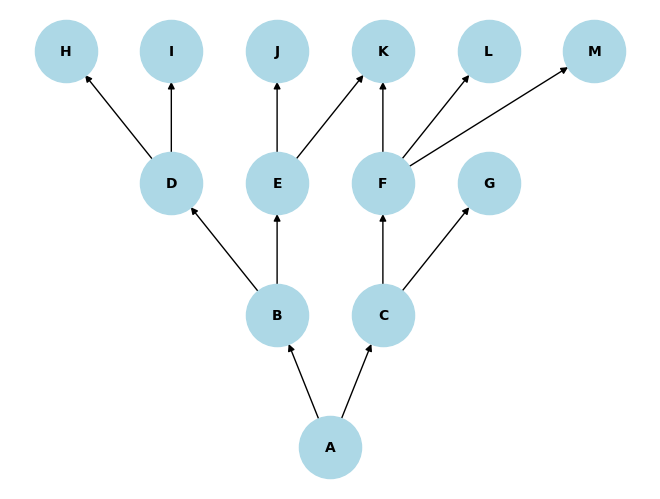

['A', 'B', 'D', 'H', 'I', 'E', 'J', 'K', 'C', 'F', 'L', 'M', 'G']


In [ ]:
# tree

tree = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H', 'I'],
    'E': ['J', 'K'],
    'F': ['L', 'M', 'K'],
    'G': [],
    'H': [], 'I': [], 'J': [], 'K': [],
    'L': [], 'M': [],
    }

plottree(tree)

# Run DFS starting from node 'A'
path = []

dfs_recursive(tree, 'A')

print(path)

## Busca em Largura (Breadth-First Search - BFS)

In [ ]:
# Run BFS starting from node 'A'
path = []

bfs(tree, 'A')

print(path)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']


# Busca em Largura (BFS) $\times$ Busca em Profundidade (DFS)

Ambos apresentam uma **complexidade de tempo O(V + E)**, onde V é o número de vértices e E é o número de arestas (edges). Mas o BFS tem uma complexidade de espaço O(V) (armazenar todos os nós em cada nível da árvore em uma fila até que sejam processados) enquanto o DFS tem uma complexidade de espaço O(h), onde h é a altura do grafo ou da árvore (emprega uma pilha para armazenar apenas o caminho de profundidade atual). Isso traz grandes limitações para esses algoritmos.

- **BFS**
  - **Vantagens**: Garante a menor distância em problemas de caminho mais curto não ponderados.
  - **Desvantagens**: Consome mais memória e pode ser menos eficiente se o espaço de estado for muito largo.

- **DFS**:
  - **Vantagens**: Usa menos espaço, especialmente em árvores ou grafos com profundidade significativa e é mais fácil de implementar com recursão.
  - **Desvantagens**: Não garante a menor distância.


<p align="right">
  <img src="https://github.com/Rogerio-mack/IA_2025S1/blob/main/figures/time_memory_BFS.png?raw=true" width="70%" align="left"/>
</p>

# Buscas Informadas

Até aqui os algoritmos de busca não empregavam qualquer informação como custo de cada caminho no grafo (como distâncias). Os algoritmos a seguir consideram essa informação.

## Heurística

Heurística é frequentemente utilizado para se referir a um técnica (de IA) que melhora o desempenho do caso médio na tarefa de solução de um problema. Você pode pensar em uma aproximação ou regra prática que pode ser empregada para reduzir o espaço de busca e encontrar uma solução satisfatória de um problema de maneira em média mais eficiente, embora **não garantindo necessariamente a solução ótima.**

## Nick's Problem

O problema de Nick em encontrar rotas na Romênia é um problema clássico de IA onde o objetivo é encontrar a rota mais curta de Arad para Bucareste, na Romênia, e empregado para aplicação e exemplos de algoritmos de busca como BFS Breadth-First Search ou A*.



<p align="right">
  <img src="https://github.com/Rogerio-mack/IA_2025S1/blob/main/figures/Romania_map.png?raw=true" width="70%" align="left"/>
</p>

### Greedy Search (Busca Gulosa)

Este algoritmo expande o caminho mais promissor em cada etapa, escolhendo o nó que parece ser o mais promissor para alcançar o objetivo com base apenas em uma função **heurística** $h(n)$ (aqui, o custo para ir do nó atual ao objetivo).

Ele não garante o caminho mais curto ou de menor custo.

<br>
<br>

![imagem](https://github.com/Rogerio-mack/IA_2025S1/blob/main/figures/greedy_best_first.png?raw=true)

### Dijkstra's Algorithm

Este algoritmo encontra **o caminho mais curto** de um nó inicial a todos os outros nós em um grafo com pesos não-negativos. Ele emprega o custo acumulado para alcançar um nó ($g(n)$), mas sempre emprega o nó mais próximo e não é assim uma aproximação ou heurística, este é um algoritmo **sem heurística**.

<br>

See: https://www.quantamagazine.org/computer-scientists-establish-the-best-way-to-traverse-a-graph-20241025/

<br>

<p align="right">
  <img src="https://github.com/Rogerio-mack/IA_2025S1/blob/main/figures/Dijkstra.jpg?raw=true" width="40%" align="left"/>
</p>




### A* ou A-Star  

Este algoritmo encontra o caminho mais curto de um nó inicial a um nó final usando como **heurística uma combinação de custo $f(n) = g(n) + h(n)$**, onde real $g(n)$ e o custo estimado $h(n)$, que prioriza nós de maneira mais informada que a busca gulosa.

<br>

<p align="right">
  <img src="https://github.com/Rogerio-mack/IA_2025S1/blob/main/figures/AStar.png?raw=true" width="50%" align="left"/>
</p>

<p align="right">
  <img src="https://github.com/Rogerio-mack/IA_2025S1/blob/main/figures/AStar_ideia.png?raw=true" width="50%" align="left"/>
</p>



# Greedy $\times$ Dijkstra $\times$ A-Star

Todos esses algoritmos têm complexidade de tempo **O(E log V)** e complexidade de espaço **O(V)** (*por quê?*). A Busca Gulosa é mais fácil de implementar e rápida, mas não garante a solução ótima. O algoritmo de Dijkstra, garante a solução ótima, mas pode ser lento para grandes grafos. O A-Star, otimiza a busca da solução de Dijkstra, mas pode falhar nos casos em que a heurística não for admissível (isto é, se houverem estimativas de custo que superestimem o custo real).

# Exercício

Crie um grafo de no mínimo 12 cidades ligando duas cidades brasileiras (por exemplo São Paulo e Rio de Janeiro, ou São Paulo e Curitiba). Implemente então dois algoritmos de busca, um BFS e outro algoritmo de busca informada de sua escolha. A entrega deve ser feita em um notebook (Colab) 100% executável. Inclua textos explicativos (é um notebook) e as referências empregadas.

Atividade em grupo, máx 5 alunos.

#### **Referências úteis**

- Notas de aula

- https://ricwtk.github.io/ai-labs/lab2/

- https://github.com/JakeDerkowski96/RomaniaProblemAI

#### **Entregas**

- **19.03** Entrega 1: Grafo das cidades (2,0), *empregue no networkx para exibir o grafo e os custos associados; explore e informe nesta entrega o algoritmo informado que será empregado na Entrega final*

- **26.03** Entrega 2: Entrega 1 + do BFS (3,0), *exiba soluções intermediárias antes da solução final*

- **02.04** Entrega 3: Entrega 1 + Entrega 2 + Algoritmo de busca informada (5,0), *discuta resumidamente os resultados*


